# Predicting Wine Quality with Machine Learning

### [https://github.com/rrgrs/wine-quality-predictions](https://github.com/rrgrs/wine-quality-predictions)

## Dataset Overview

This project utilizes a dataset comprising physicochemical and sensory variables related to the Portuguese "Vinho Verde" wine, available from the UCI Machine Learning Repository. The dataset encompasses both red and white wine variants but omits information on grape types, brands, and prices due to privacy concerns. The data can serve multiple purposes, including classification and regression tasks, given that the quality classes are ordered yet unbalanced, with a higher frequency of normal-quality wines than either excellent or poor ones. This characteristic suggests the potential utility of outlier detection techniques to identify the few excellent or poor wines among the majority. Additionally, the combined dataset of red and white wines, from which some values were randomly removed, presents an opportunity to explore the relevance of input variables to wine quality, hinting at the potential benefits of employing feature selection methods to enhance predictive models. This dataset's unique composition and structure offer a rich ground for applying various machine learning techniques to predict wine quality based on physicochemical properties.

## Project Objective

The primary objective of this project is to predict the quality of Portuguese "Vinho Verde" wines by leveraging machine learning algorithms to analyze their physicochemical characteristics. Given the dataset's composition of sensory quality outputs and various physicochemical inputs, the project aims to uncover the underlying patterns and relationships that dictate wine quality. Through classification or regression models, we intend to accurately categorize wines into quality classes or predict their quality score. This analysis not only seeks to enhance our understanding of what factors contribute most significantly to wine quality but also to provide valuable insights for vintners and consumers alike in identifying high-quality wines based on measurable attributes. The challenge of unbalanced classes and the potential irrelevance of some features will drive the exploration of advanced machine learning techniques, including outlier detection and feature selection, to achieve robust and meaningful predictions.

## Project Plan

### Part 1: Exploratory Data Analysis, Data Cleaning, and Preprocessing

- **Exploratory Data Analysis (EDA):** Begin with a thorough EDA to understand the distribution of variables, the relationship between the physicochemical properties and wine quality, and to identify any patterns or anomalies. This will include statistical summaries, correlation analysis, and visualizations such as histograms, scatter plots, and box plots.
- **Data Cleaning:** Address any missing, incorrect, or outlier data points identified during EDA. This step is crucial for improving model accuracy and reliability. Strategies may involve imputing missing values, removing or correcting outliers, and ensuring data integrity.
- **Preprocessing:** Normalize or standardize the data to ensure that the scale of the features does not unduly influence model performance. Additionally, encode categorical variables if present, and split the dataset into training and test sets to prepare for model training.

### Part 2: Model Training and Feature Selection

- **Model Training:** Train various supervised learning models to predict wine quality. Models to consider include linear regression, logistic regression, decision trees, random forests, support vector machines, and neural networks. The choice between classification and regression models will depend on the specific nature of the quality variable (categorical vs. continuous).
- **Feature Selection:** Implement feature selection techniques to identify the most important features contributing to wine quality. This could be achieved through methods like Recursive Feature Elimination (RFE), Principal Component Analysis (PCA), or by examining feature importance scores in tree-based models. The goal is to reduce dimensionality and improve model performance by focusing on relevant features.

### Part 3: Model Comparison and Evaluation

- **Model Evaluation:** Evaluate each model's performance using appropriate metrics. For regression tasks, consider using Mean Absolute Error (MAE), Mean Squared Error (MSE), or R-squared. For classification tasks, accuracy, precision, recall, F1 score, and the confusion matrix are relevant metrics. Utilize cross-validation to ensure the model's generalizability.
- **Comparison and Selection:** Compare the models based on their performance metrics, computational efficiency, and ease of interpretation. Discuss the trade-offs involved in choosing one model over another based on the specific objectives and constraints of the project.
- **Conclusion and Future Work:** Conclude with a summary of findings, including the best-performing model and key features influencing wine quality. Suggest areas for future research, such as testing additional models, exploring more sophisticated feature engineering techniques, or applying the model to different types of wine.

## Import Files and Load Data

In [6]:
import os
import numpy as np 
import pandas as pd
from time import time
from dotenv import dotenv_values
from kaggle.api.kaggle_api_extended import KaggleApi
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, KFold, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import RFECV
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import seaborn as sns

In [8]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

env = dotenv_values()
for k, v in env.items():
    os.environ[k] = v

competition_name = 'rajyellow46/wine-quality'
data_dir = 'data'
dataset_file = f'{data_dir}/winequalityN.csv'

api = KaggleApi()
api.authenticate()

if os.path.isfile(dataset_file) == False:
    api.dataset_download_files(competition_name, path=data_dir, unzip=True)

df = pd.read_csv(dataset_file)

# Part 1: Exploratory Data Analysis, Data Cleaning, and Preprocessing

## Initial Data Exploration

Upon loading the dataset, we start with `df.info()`, which gives us a concise overview of the columns, their data types, and the counts of non-null values, highlighting areas that may require data cleaning. Next, `df.describe()` is employed to provide a statistical summary of numerical features, such as mean values and standard deviations, offering insights into the data's central tendencies and variability. To understand the makeup of our dataset further, we investigate the proportion of red to white wines, giving us valuable context regarding the dataset's composition and potential biases. After examining the overall structure and statistical properties, we look at the first few entries with `df.head()`, obtaining a tangible view of the data's actual values and formats. The final step in our exploration involves calculating the proportion of rows containing NaN values relative to the total dataset, which helps us determine the significance of missing data and informs our strategy for handling these rows. This structured approach to initial data exploration ensures we have a thorough understanding of our dataset's characteristics, setting a solid foundation for subsequent data cleaning, preprocessing, and analysis.

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [14]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [17]:
# get counts and distribution of wine types
distribution = df['type'].value_counts()
percentage_distribution = df['type'].value_counts(normalize=True) * 100

print(distribution)
print(percentage_distribution)

type
white    4898
red      1599
Name: count, dtype: int64
type
white    75.388641
red      24.611359
Name: proportion, dtype: float64


In [12]:
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [80]:
# get total rows and rows with NaN values
total_rows = len(df)
rows_with_nan = df.isna().any(axis=1).sum()
proportion_with_nan = rows_with_nan / total_rows

print(f"Total rows: {total_rows}")
print(f"Rows with NaN: {rows_with_nan}")
print(f"Proportion of rows with NaN: {proportion_with_nan:.2%}")

Total rows: 6497
Rows with NaN: 34
Proportion of rows with NaN: 0.52%


### Initial Insights from Data Overview

- **Dataset Composition**: The dataset consists of 6,497 entries, each representing a specific wine sample, across 13 different attributes, including physicochemical properties and sensory quality rating.
- **Attribute Types**: The attributes primarily consist of floating-point numbers (11 float64) and one integer (int64) for the quality rating, alongside one object type indicating the wine type (red or white).
- **Missing Values**: With minor missing values noted in several columns such as fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, and pH, there's a clear indication for the need for data cleaning.
    - **Missing Values Analysis**: The `isna()` analysis reveals 34 rows with NaN values out of 6,497 (proportion of rows with NaN: 0.52%). Given this small proportion, the recommended course of action is to remove these rows to maintain data integrity without significantly impacting the dataset's size.
- **Key Statistics**:
  - A moderate overall wine quality in the dataset is indicated by a mean quality rating of approximately 5.82, on a scale from 3 to 9.
  - The dataset shows wide variability in alcohol content and sulfur dioxide levels, suggesting diverse preservation levels and flavor profiles among the wines.
- **Data Distribution**: A diverse set of wine profiles is suggested by the standard deviations and ranges for several physicochemical properties, alongside the presence of outliers in sulfur dioxide levels and residual sugar.
- **Quality Distribution**: The majority of wines receive a score around the median value of 6, suggesting a skew towards moderate-quality wines within the dataset.
- **Wine Type Distribution**: A significant imbalance is observed between white and red wines, with approximately 75.39% being white wine. This indicates a predominant focus on white wines in the "Vinho Verde" samples collected.

These insights lay the groundwork for understanding the dataset's structure and variables, guiding data cleaning and preprocessing steps to ensure a robust analysis or modeling phase.

## Advanced EDA and Data Cleaning

In the next steps, we'll engage in advanced exploratory data analysis and cleaning to refine our understanding and preparation of the dataset. This will involve sophisticated handling of missing values through imputation or exclusion and identifying outliers using methods like the Interquartile Range (IQR) for removal or adjustment. We'll also assess relationships between variables using correlation matrices and visual tools, highlighting key predictors of wine quality. Encoding categorical variables for machine learning and standardizing numerical inputs will be essential for model readiness. This phase is crucial for ensuring the dataset's quality and coherence, setting the stage for effective predictive modeling.

### Data Cleaning

The data cleansing phase for the wine dataset is crucial for preparing the data for machine learning algorithms. Initially, we address the dataset's missing values by removing rows containing NaN values. Given that the proportion of these rows is minimal, this approach ensures data integrity without significantly reducing the dataset's size. Next, we focus on handling categorical variables, such as the 'type' attribute that differentiates between 'red' and 'white' wines. To accommodate this nominal categorical attribute in our analysis, we apply one-hot encoding, generating binary attributes—'wine_type_red' and 'wine_type_white'. This encoding converts the categorical 'type' attribute into a numerical format, where a '1' denotes the presence of the category, and '0' denotes its absence, thus maintaining the dataset's analytical rigor without introducing bias. Following the encoding, the original 'type' attribute is removed from the dataset. This structured approach to data cleansing, which includes both the removal of rows with missing values and the thoughtful transformation of categorical variables, ensures the dataset is optimized for subsequent machine learning tasks.

In [9]:
# Generate one-hot encoded columns
type_dummies = pd.get_dummies(df['type'], prefix='wine_type')

# Concatenate the one-hot encoded columns to the original DataFrame
df = pd.concat([df, type_dummies], axis=1)

# Drop rows containing NaN values:
df.dropna(axis=0, inplace=True)

### Interquartile Range (IQR) of Attributes

The Interquartile Range (IQR) chart is a crucial visualization in the exploratory data analysis that provides a snapshot of the distribution of each attribute in the wine dataset. It delineates the spread of the middle 50% of the data, illustrating the central tendency and dispersion of each attribute’s values. In the chart, the box represents the IQR between the first quartile (25th percentile) and the third quartile (75th percentile), and the line within the box pinpoints the median. Whiskers extend from the box to the furthest points that are not considered outliers, and points beyond these whiskers indicate outliers that fall significantly higher or lower than the rest of the data. This chart is instrumental in identifying attributes with skewed distributions, potential outliers, and unusual values, thus informing subsequent data cleansing operations such as outlier treatment and data normalization.

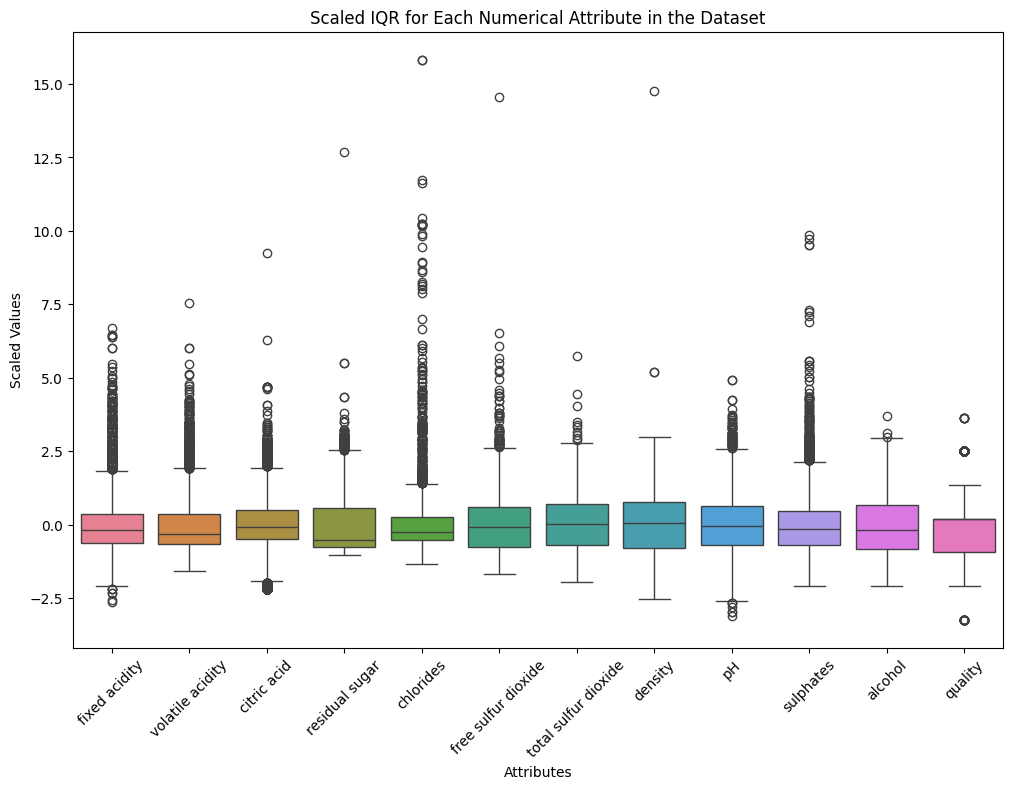

In [274]:
numerical_df = df.select_dtypes(include=['float64', 'int64'])

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the data
scaled_data = scaler.fit_transform(numerical_df)
scaled_df = pd.DataFrame(scaled_data, columns=numerical_df.columns)

# Plotting the scaled data
plt.figure(figsize=(12, 8))
sns.boxplot(data=scaled_df)

plt.title('Scaled IQR for Each Numerical Attribute in the Dataset')
plt.xlabel('Attributes')
plt.ylabel('Scaled Values')
plt.xticks(rotation=45)  # Rotating attribute names for better readability
plt.show()

### Interquartile Range Summary

The boxplot visualizes the Interquartile Range (IQR) for each numerical attribute in the dataset after scaling. Here's a description of the data distribution as indicated by the plot:

- **Center and Spread**: For most attributes, the median (the line in the middle of each box) is close to 0, which is expected after scaling. The interquartile ranges (the lengths of the boxes) vary, indicating different levels of variability amongst the attributes. Attributes like "free sulfur dioxide" and "total sulfur dioxide" have wider IQRs, suggesting more variability.

- **Symmetry**: Several attributes show a relatively symmetrical distribution of data around the median, such as "citric acid," "density," and "pH." Other attributes, like "fixed acidity," "volatile acidity," "chlorides," and "sulphates," display a slight skew as indicated by the box's positioning above or below the zero line.

- **Outliers**: There are many outliers present across almost all attributes, as seen by the dots outside of the whiskers. The "residual sugar," "free sulfur dioxide," and "total sulfur dioxide" have particularly numerous outliers, indicating the presence of many values that deviate significantly from the rest.

- **Comparisons**: When comparing the attributes, "alcohol" and "quality" seem to have the least number of outliers, while attributes like "residual sugar" and "free sulfur dioxide" have a high number of outliers. The presence of these outliers could influence the performance of certain machine learning models and might need to be addressed.

Overall, the boxplot suggests that while some attributes exhibit relatively tight distributions around the mean, others have wider spreads and numerous outliers that could impact the analysis. It's important to consider these factors when selecting or engineering features for modeling.

### Correlation Analysis

Correlation analysis for each attribute in relation to the wine quality reveals how strongly each physicochemical characteristic is associated with the sensory evaluation of wine. By calculating the correlation coefficient, we discern the degree and direction of the relationship—whether positive or negative—between each attribute and the overall quality rating. A positive correlation indicates that as the attribute value increases, the quality rating tends to increase, suggesting a favorable influence on perceived quality. Conversely, a negative correlation suggests that higher attribute values may correspond to lower quality ratings, indicating an adverse effect. This analysis is crucial to understanding which factors are potential predictors of quality and could guide winemakers in refining their craft and also inform machine learning models to focus on the most impactful attributes.

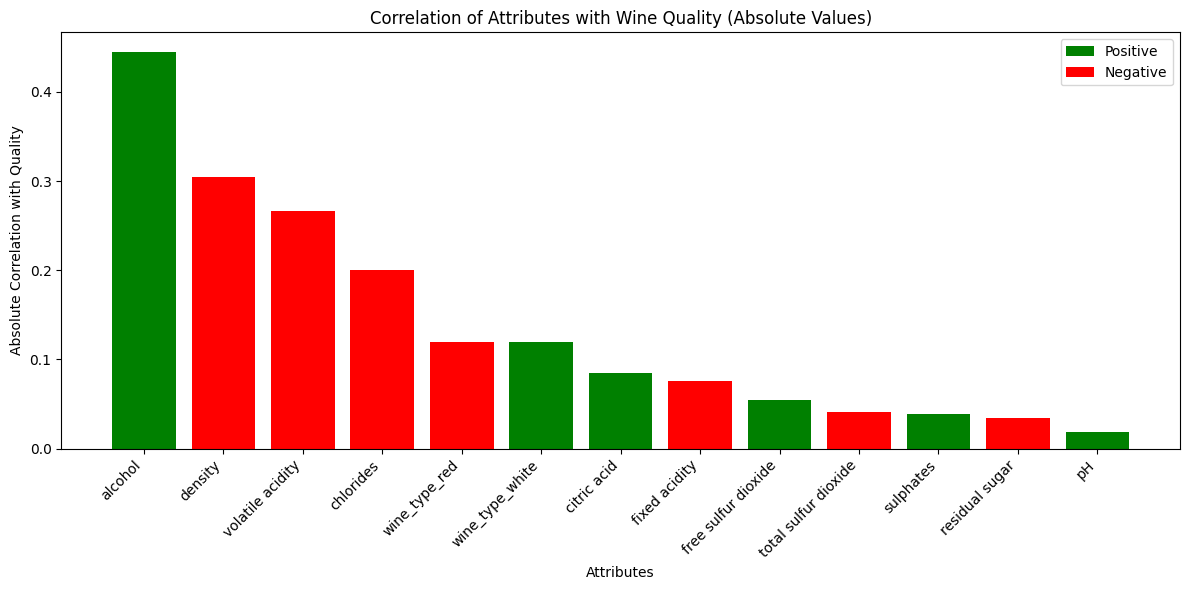

,Attribute,Absolute Correlation,Correlation Type
0,alcohol,0.444637,Positive
1,density,0.304447,Negative
2,volatile acidity,0.266677,Negative
3,chlorides,0.200553,Negative
4,wine_type_red,0.119185,Negative
5,wine_type_red,0.119185,Negative
6,wine_type_white,0.119185,Positive
7,wine_type_white,0.119185,Positive
8,citric acid,0.084926,Positive
9,fixed acidity,0.076174,Negative


In [85]:
# Drop the original 'type' column
df_corr = df.drop('type', axis=1, inplace=False)

# Calculate the correlation matrix
correlation_matrix = df_corr.corr()
sorted_corr = correlation_matrix['quality'].drop('quality').sort_values(key=abs, ascending=False)

# Isolate the 'quality' correlation
quality_correlation = correlation_matrix['quality'].drop('quality').abs().sort_values(ascending=False).reset_index()  # Drop self-correlation
quality_correlation.columns = ['Attribute', 'Absolute Correlation']
quality_correlation['Correlation Type'] = np.where(sorted_corr > 0, 'Positive', 'Negative')

color_map = {'Positive': 'green', 'Negative': 'red'}
quality_correlation['Color'] = quality_correlation['Correlation Type'].map(color_map)

# Plotting the bar graph
plt.figure(figsize=(12, 6))
bars = plt.bar(quality_correlation['Attribute'], quality_correlation['Absolute Correlation'], color=quality_correlation['Color'])

# Add title and labels to the plot
plt.title('Correlation of Attributes with Wine Quality (Absolute Values)')
plt.xlabel('Attributes')
plt.ylabel('Absolute Correlation with Quality')
plt.xticks(rotation=45, ha='right')  # Rotate attribute names for better readability

# Add a legend to the plot
legend_elements = [Patch(facecolor=color_map['Positive'], label='Positive'),
                   Patch(facecolor=color_map['Negative'], label='Negative')]
plt.legend(handles=legend_elements, loc='upper right')

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

# Display the table with attribute, absolute correlation, and correlation type
quality_correlation.drop('Color', axis=1)


### Summary of Correlation Analysis

The attached bar graph represents the absolute values of correlations between various attributes and wine quality:

- **Alcohol** has the strongest positive correlation with wine quality, suggesting that wines with higher alcohol content tend to have higher quality ratings.
- **Density** and **Volatile Acidity** are negatively correlated with quality, indicating that lower density and lower volatile acidity levels are characteristics of higher-quality wines.
- **Chlorides** also show a negative correlation with quality, hinting that higher levels of chlorides may be associated with lower-quality wines.
- The **Type of Wine** is differentiated by color, with **Type Red** showing a negative correlation and **Type White** displaying a positive correlation with quality, signifying that these properties may have distinct influences on the quality perception of the wines.
- **Citric Acid**, **Fixed Acidity**, **Free Sulfur Dioxide**, **Total Sulfur Dioxide**, **Sulphates**, **Residual Sugar**, and **pH** all show smaller magnitudes of correlation. Positive correlations suggest that an increase in these attributes correlates with higher wine quality, while negative correlations indicate the opposite.

The graph visually distinguishes between positive and negative correlations using green and red bars, respectively. This visual representation allows for a quick assessment of which attributes are most strongly associated with the quality of wine, both in terms of the strength and direction of these relationships.

# Part 2: Model Training and Feature Selection

## Model Selection

In this section of the project, we will explore and compare three distinct supervised learning models to predict the quality score of Portuguese "Vinho Verde" wines:

1. **Logistic Regression**: Chosen for its suitability with categorical outcomes, logistic regression is preferred over linear regression for the wine quality scores, which are discrete. It models the probability of each quality category, providing an interpretable mechanism to classify wines based on their features. This approach aligns with the categorical nature of our target variable, offering a direct and clear method for predicting wine quality.

2. **Random Forest Classifier**: Recognizing the potential non-linear relationships between the features and the wine quality score, we will employ the Random Forest Classifier. This ensemble method, which builds and combines multiple decision trees, aims to improve accuracy and robustness against overfitting compared to a single decision tree model. The aggregation of predictions from numerous trees is expected to enhance the model's performance in capturing the complex dynamics influencing wine quality.

3. **K-Nearest Neighbors (KNN)**: To assess the utility of a non-parametric approach, the KNN algorithm will be evaluated for its ability to classify wines based on the similarity of their feature vectors to those of neighbors with known quality scores. The model's reliance on the choice of the 'k' parameter and an appropriate distance metric introduces flexibility and intuition to the modeling process, albeit with considerations for computational efficiency and sensitivity to feature scaling.

We will conduct a comparative analysis of these models, focusing on their predictive accuracy, interpretability, and computational demands. This comparison will inform the selection of the most appropriate model(s) for accurately predicting the quality scores of "Vinho Verde" wines, balancing between the complexity of relationships in the data and the practicality of model deployment. But first we need a few helper functions to help evaluate results.

In [10]:
def plot_conf_matrix(yt, yp):
    labels = yt.unique()
    cfm = confusion_matrix(yt, yp, labels=labels)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cfm, annot=True, fmt='.0f', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('Truth')
    plt.title('Confusion matrix')
    print(f'Accuracy score: {display_percent(accuracy_score(yt, yp))}')
    plt.show()

# create reusable function for measuring cross val score
def cross_val_score_with_kfold(model, X, y):
    # Set up k-Fold cross-validation
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    # Use cross_val_score to perform cross-validation
    scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')
    # Print the accuracy for each fold
    print(f'Accuracy for each fold: {list(map(lambda s: display_percent(s), scores))}')

    # Print the mean accuracy across all folds
    print(f'Mean cross-validation accuracy: {display_percent(np.mean(scores))}', )

def display_percent(num):
    return f'{round(num*100, 3)}%'

# Let's prepare the data:
X = df.drop(['quality', 'type'], axis=1)  # Features
y = df['quality']  # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state=41)

## Logistic Regression

The below code will train the first iteration of my `LogisticRegression` model and evaluate the results.

- The code employs **k-fold cross-validation** with **5 folds** to train and evaluate a logistic regression model, ensuring a robust assessment of the model's performance on the wine quality prediction task.
- A **pipeline** combining `StandardScaler` for feature scaling and `LogisticRegression` is used. Scaling is crucial to normalize feature contributions and improve model convergence.
- The **`KFold`** method from scikit-learn creates 5 separate folds, mixing the data to ensure diverse training and testing sets, which helps in accurately estimating the model's performance.
- **`cross_val_score`** automates the cross-validation, training the model on each subset and calculating accuracy scores, thereby providing a comprehensive view of how well the model performs across different data segments.
- The code outputs the **accuracy for each fold** and the **mean accuracy** across all folds. This feedback illustrates the model's predictive accuracy and its stability across the dataset.

Accuracy for each fold: ['53.828%', '56.226%', '53.751%', '53.638%', '54.644%']
Mean cross-validation accuracy: 54.417%
Accuracy score: 54.679%


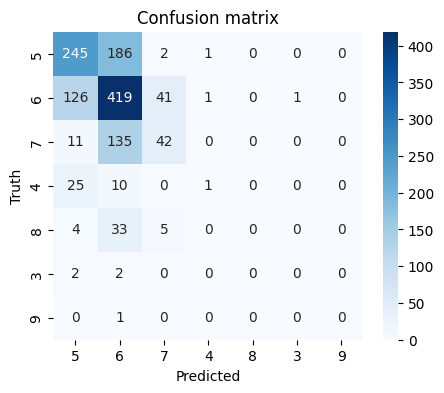

In [262]:
# Initialize a logistic regression model
# Using a pipeline to ensure features are scaled for each cross-validation fold
lr_model = make_pipeline(StandardScaler(), LogisticRegression(max_iter=10000))

# Use cross_val_score to perform cross-validation
cross_val_score_with_kfold(lr_model, X, y)

# train on all the data and show confusion matrix
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)
plot_conf_matrix(y_test, y_pred)

### Initial Results and Feature Selection

The initial training of the `LogisticRegression` model with 5-fold cross-validation yielded accuracy scores ranging from approximately 53.638% to 56.226%. This variance suggests some inconsistency in the model's performance, likely due to its current inability to fully capture the dataset's underlying patterns. The average accuracy score of around 54.417% indicates a moderate predictive capability but also highlights room for improvement. To enhance the model's accuracy and consistency, we plan to implement feature selection as our next step. This will involve using techniques such as `RFECV` (Recursive Feature Elimination with Cross-Validation) to systematically identify and retain the most impactful variables for wine quality prediction.

`RFECV` automates the feature selection process by recursively removing features and evaluating model performance via cross-validation. This approach not only helps in pinpointing the essential features but also optimizes model complexity, potentially leading to better generalization on unseen data. By streamlining the feature set with `RFECV`, we aim to improve the `LogisticRegression` predictive accuracy and provide deeper insights into the attributes that most significantly influence wine quality.

Accuracy for each fold: ['52.359%', '54.524%', '53.751%', '53.638%', '54.257%']
Mean cross-validation accuracy: 53.706%
Accuracy score: 54.37%


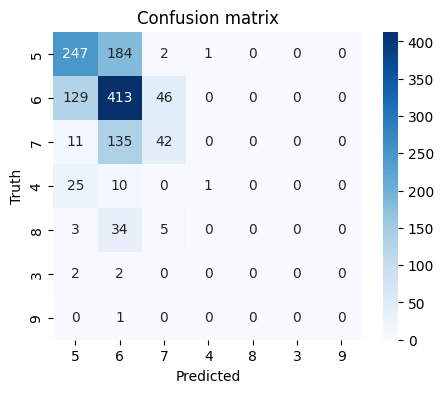

In [276]:
# Create an RFECV object
selector = RFECV(estimator=lr_model, step=1, cv=5, scoring='accuracy', importance_getter='named_steps.logisticregression.coef_')

cross_val_score_with_kfold(selector, X, y)

# train and show confusion matrix
selector.fit(X_train, y_train)
y_pred = selector.predict(X_test)
plot_conf_matrix(y_test, y_pred)

### Feature Selection Results and Hyperparameter Optimization

The application of Recursive Feature Elimination with Cross-Validation (`RFECV`) for our `LogisticRegression` resulted in a slight decrease in performance, with the mean cross-validation accuracy falling from about 54.417% to 53.783%. This indicates that `RFECV` may have removed features critical to the model's prediction accuracy. Consequently, we've decided against using `RFECV` for feature selection, aiming instead to maintain the model's complexity to better capture the data's intricacies.

To further optimize our model, we plan to implement `GridSearchCV` as the next step. This method will allow us to systematically explore a range of hyperparameter values, identifying the combination that maximizes the model's performance. By automating the search for the optimal hyperparameters, including regularization strength and the choice of penalty, `GridSearchCV` provides a comprehensive approach to enhancing our `LogisticRegression`. This process not only aims to improve accuracy but also to ensure our model achieves a better generalization on unseen data, potentially offsetting the reduction in performance noted after the initial feature selection attempt.

In [263]:
# Define the parameter grid to search over
param_grid = {
    'logisticregression__C': [0.001, 0.01, 0.1, 1, 10],
    'logisticregression__penalty': ['l2'],  # 'l1' penalty is not supported by 'lbfgs'
    'logisticregression__solver': ['newton-cg', 'saga', 'liblinear', 'lbfgs'],  # Solvers that support multinomial logistic regression
}

# Initialize GridSearchCV with the pipeline and parameter grid
grid_search = GridSearchCV(lr_model, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Assuming X and y are defined (your features and target variable)
# Fit GridSearchCV
grid_search.fit(X, y)

# Print the best parameters and the best score achieved
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation accuracy:", display_percent(grid_search.best_score_))

# Optionally, use the best estimator for further predictions
lr_best_model = grid_search.best_estimator_

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters: {'logisticregression__C': 10, 'logisticregression__penalty': 'l2', 'logisticregression__solver': 'newton-cg'}
Best cross-validation accuracy: 51.415%


After finding the optimal parameters for the model we will use the best model to run the same cross-validation accuracy test as the initial model to make an apples-to-apples comparison and see which one performed better.

Accuracy for each fold: ['53.828%', '56.226%', '54.06%', '53.947%', '54.412%']
Mean cross-validation accuracy: 54.495%
Accuracy score: 54.138%


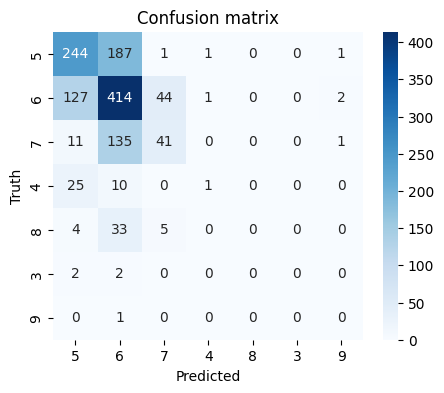

In [266]:
# Use cross_val_score to perform cross-validation
cross_val_score_with_kfold(lr_best_model, X, y)

# train on all the data and show confusion matrix
lr_best_model.fit(X_train, y_train)
y_pred = lr_best_model.predict(X_test)
plot_conf_matrix(y_test, y_pred)

### Hyperparamter Optimization Results

The optimization of the `LogisticRegression` through GridSearchCV led to a nuanced improvement in its performance. Initially, the model exhibited a mean cross-validation accuracy of 54.495%, with scores across the folds ranging from approximately 53.828% to 56.226%. After applying GridSearchCV to fine-tune the hyperparameters, specifically selecting `C=10`, `penalty='l2'`, and `solver='newton-cg'`, the model achieved a slightly higher mean cross-validation accuracy of approximately 54.495%. The accuracy scores across the folds showed a more consistent performance, with a tighter range from about 53.828% to 56.226%.

This incremental improvement highlights the value of hyperparameter tuning in enhancing model accuracy, albeit modestly in this case. The use of GridSearchCV not only optimized the model's parameters but also demonstrated that even small adjustments could lead to better and more consistent predictions. Such optimizations, particularly in models as critical as those predicting wine quality, underscore the importance of rigorous parameter tuning in the model development process.

## Random Forest Classifier

Training a `RandomForestClassifier` for wine quality prediction will follow a structure similar to our logistic regression approach, including the use of k-fold cross-validation and a streamlined workflow. However, the RandomForest model introduces unique aspects:

- **Scaling Not Required**: RandomForest does not require input features to be scaled, as it is less sensitive to the scale of features.
- **Hyperparameter Tuning**: Key to RandomForest optimization is the tuning of specific hyperparameters such as `n_estimators` and `max_depth`, which are critical for preventing overfitting and maximizing model performance.
- **Feature Importance**: RandomForest offers valuable insights through feature importances, aiding in effective feature selection and model simplification.

The refinement process will focus on these RandomForest-specific considerations, particularly hyperparameter optimization and leveraging feature importance for model improvement. This tailored approach aims to enhance the `RandomForestClassifier` accuracy in predicting wine quality, capitalizing on its strengths while mitigating potential overfitting.

Accuracy for each fold: ['66.28%', '70.379%', '69.838%', '68.266%', '69.118%']
Mean cross-validation accuracy: 68.776%
Accuracy score: 70.998%


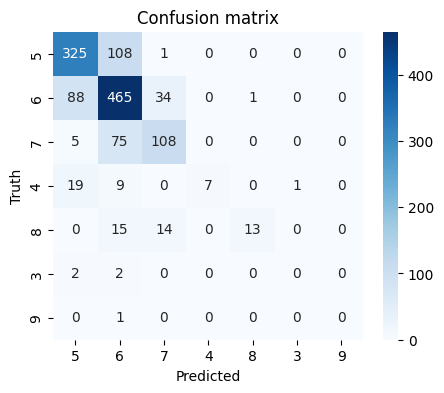

In [281]:
# Initialize a random forest model
# Using a pipeline for potential future scaling or preprocessing steps
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Use cross_val_score to perform cross-validation
cross_val_score_with_kfold(rf_model, X, y)

# train on all the data and show confusion matrix
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
plot_conf_matrix(y_test, y_pred)

### Initial Results and Feature Selection

After the initial success of our `RandomForestClassifier`, demonstrated by consistent accuracy scores ranging from 66.28% to 70.379% across a 5-fold cross-validation, we're poised to refine our approach further. The model's mean accuracy of 68.776% signals its strong predictive power for wine quality. We will again use `RFECV` for feature selection. This next step will focus on optimizing the model by identifying and retaining the most impactful features, potentially improving accuracy and model efficiency. `RFECV` promises a targeted method to streamline the feature set, enhancing our `RandomForestClassifier` performance. Alongside hyperparameter tuning and exploring additional data, `RFECV` forms a critical component of our strategy to elevate the model's predictive capability in wine quality classification.

Accuracy for each fold: ['66.048%', '70.379%', '69.296%', '68.576%', '69.737%']
Mean cross-validation accuracy: 68.807%
Accuracy score: 70.456%


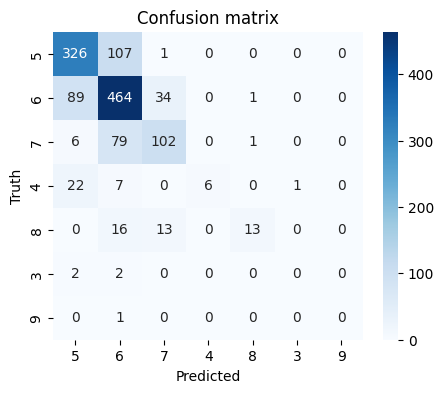

In [277]:
selector = RFECV(estimator=rf_model, step=1, cv=5, scoring='accuracy')

# Use cross_val_score to perform cross-validation
cross_val_score_with_kfold(selector, X, y)

# train and show confusion matrix
selector.fit(X_train, y_train)
y_pred = selector.predict(X_test)
plot_conf_matrix(y_test, y_pred)

### Feature Selection Results and Hyperparameter Optimization

Upon implementing feature selection via `RFECV` on our `RandomForestClassifier`, the results have provided a nuanced view of its impact on predictive accuracy for wine quality classification. The accuracy scores post-feature selection span from 66.048% to 70.379%, reflecting a performance range that closely mirrors the initial model training results, which varied from 66.28% to 70.379%. Interestingly, the mean cross-validation accuracy slightly decreased from an initial 68.776% to 68.807% after feature selection. This subtle change suggests that while `RFECV` helped in focusing the model on the most pertinent features, the overall predictive performance remained largely consistent, with only a marginal adjustment in accuracy. This scenario indicates that the initial model was already performing at a high level of efficiency with respect to feature utilization. Consequently, these findings underscore the complexity of feature selection's impact, confirming that while it is essential for model refinement, its benefits may vary depending on the specific model and dataset characteristics. The results, therefore, support a thoughtful consideration of feature selection as part of the model optimization process, but also highlight its potential limitations in substantially enhancing model performance when the initial model is already highly optimized.

In [283]:
# Define the parameter grid to search over for Random Forest
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# Initialize GridSearchCV with the pipeline and parameter grid
grid_search_rf = GridSearchCV(rf_model, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Fit GridSearchCV using feature reduced data
grid_search_rf.fit(X, y)

# Print the best parameters and the best score achieved
print("Best parameters:", grid_search_rf.best_params_)
print("Best cross-validation accuracy:", display_percent(grid_search_rf.best_score_))

# Optionally, use the best estimator for further predictions
rf_best_model = grid_search_rf.best_estimator_

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best parameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 10}
Best cross-validation accuracy: 50.92%


Accuracy for each fold: ['59.783%', '61.794%', '60.48%', '58.746%', '60.759%']
Mean cross-validation accuracy: 60.312%
Accuracy score: 63.496%


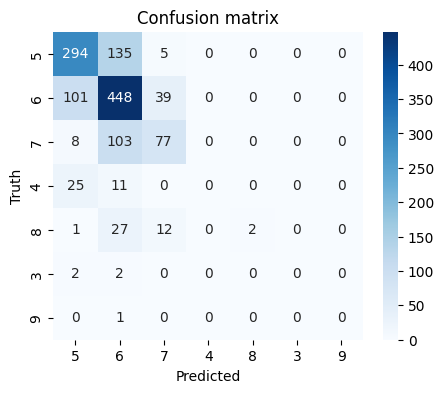

In [284]:
# Use cross_val_score to perform cross-validation
cross_val_score_with_kfold(rf_best_model, X, y)

# train and show confusion matrix
rf_best_model.fit(X_train, y_train)
y_pred = rf_best_model.predict(X_test)
plot_conf_matrix(y_test, y_pred)

### Hyperparamter Optimization Results

After the initial model training, our `RandomForestClassifier` demonstrated strong performance, with accuracy scores ranging from 66.28% to 70.379% and an average of 68.776%. This indicated a solid foundation for wine quality prediction. Yet, the application of hyperparameter optimization led to a surprising decline in performance, with accuracy across folds falling to between 59.783% and 61.794%, and a mean accuracy settling at 60.312%. This reduction, despite careful adjustment of the model's parameters, highlights the challenges inherent in refining model performance. The drop could be attributed to issues like overfitting or less-than-ideal hyperparameter configurations. While further investigation might shed light on these matters, it falls outside the immediate scope of our project, which remains centered on achieving reliable wine quality predictions within the bounds of our current capabilities and resources.

In [188]:
rf_best_model = rf_model

## K-Nearest Neighbors (KNN)

In initiating the training of our `KNeighborsClassifier` (KNN) model for predicting wine quality, we employ a methodology similar to that used with the `RandomForestClassifier`, including the use of k-fold cross-validation with 5 folds and the application of a pipeline for preprocessing. However, distinct to KNN, the pipeline incorporates `StandardScaler` for feature normalization—a critical step for KNN due to its sensitivity to the scale of input features, which directly influences the distance calculations fundamental to the model's operation.

Key distinctions and subsequent steps for the KNN model include:
- **Feature Scaling Necessity**: Unlike Random Forest, KNN's performance is heavily dependent on the distance between features. Thus, standardizing features to have the same scale is crucial for improving model accuracy.
- **Parameter Optimization**: Post-initial training, optimization for KNN focuses on tuning hyperparameters unique to this model, such as the number of neighbors (`n_neighbors`) and the choice of distance metric (e.g., Euclidean, Manhattan). These parameters are pivotal in adapting the KNN model to the dataset's intricacies.

This approach underscores the adaptability of our evaluation strategy across different models while highlighting the specific requirements and optimization techniques pertinent to KNN. Just as with Random Forest, these steps are designed to ensure a robust assessment of model performance, yet they cater to the unique characteristics and optimization needs of the KNN algorithm.

Accuracy for each fold: ['55.762%', '56.767%', '58.005%', '54.954%', '57.276%']
Mean cross-validation accuracy: 56.553%
Accuracy score: 57.386%


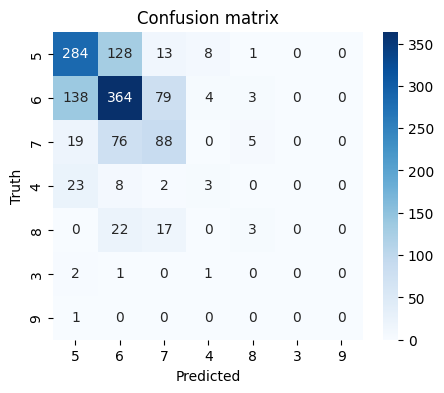

In [11]:
# Initialize a KNN model within a pipeline to ensure features are scaled for cross-validation
knn_model = make_pipeline(StandardScaler(), KNeighborsClassifier())

# Use cross_val_score to perform cross-validation
cross_val_score_with_kfold(knn_model, X, y)

# train on all the data and show confusion matrix
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)
plot_conf_matrix(y_test, y_pred)

### Initial Results and Hyperparameter Optimization

Following the initial training of our `KNeighborsClassifier` model, the accuracy scores across a 5-fold cross-validation varied from 55.762% to 58.005%, with a mean cross-validation accuracy of 56.553%. The overall accuracy score of the model stood at 57.386%, indicating a reasonable starting point for the predictive modeling of wine quality. Unlike the `RandomForestClassifier`, feature selection is generally not applicable to the KNN approach due to its reliance on the proximity of samples in the feature space, which inherently considers all features. Therefore, instead of pursuing feature selection, our next steps will focus on hyperparameter optimization. This process will involve fine-tuning parameters such as the number of neighbors (k) and the distance metric used, to enhance the model's performance. Hyperparameter optimization aims to identify the optimal settings that maximize the predictive accuracy of our `KNeighborsClassifier` model, potentially leading to significant improvements in its ability to classify wine quality accurately.

In [12]:
# Define the parameter grid to search over for KNeighborsClassifier
param_grid = {
    'kneighborsclassifier__n_neighbors': [3, 5, 7, 10],
    'kneighborsclassifier__weights': ['uniform', 'distance'],
    'kneighborsclassifier__p': [1, 2]
}

# Initialize GridSearchCV with the pipeline and parameter grid
grid_search_knn = GridSearchCV(knn_model, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Fit GridSearchCV using feature reduced data
grid_search_knn.fit(X, y)

# Print the best parameters and the best score achieved
print("Best parameters:", grid_search_knn.best_params_)
print("Best cross-validation accuracy:", display_percent(grid_search_knn.best_score_))

# Optionally, use the best estimator for further predictions
knn_best_model = grid_search_knn.best_estimator_

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameters: {'kneighborsclassifier__n_neighbors': 10, 'kneighborsclassifier__p': 2, 'kneighborsclassifier__weights': 'distance'}
Best cross-validation accuracy: 47.299%


Accuracy for each fold: ['64.192%', '67.981%', '69.064%', '67.724%', '66.563%']
Mean cross-validation accuracy: 67.105%
Accuracy score: 67.363%


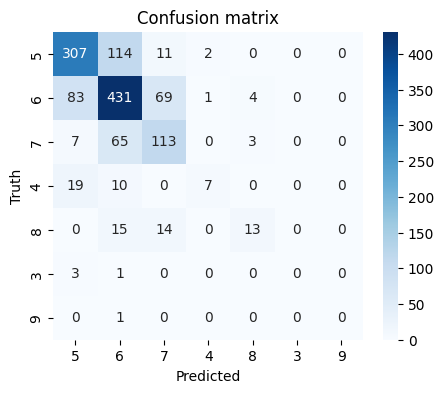

In [13]:
# Use cross_val_score to perform cross-validation
scores = cross_val_score_with_kfold(knn_best_model, X, y)

# train on all the data and show confusion matrix
knn_best_model.fit(X_train, y_train)
y_pred = knn_best_model.predict(X_test)
plot_conf_matrix(y_test, y_pred)

### Hyperparamter Optimization Results

After the application of hyperparameter tuning to our `KNeighborsClassifier` model, we observed a significant improvement in performance compared to the initial model training results. The accuracy scores across a 5-fold cross-validation ranged from 64.192% to 69.064%, with a mean cross-validation accuracy of 67.105%. The overall accuracy score of the model also increased to 67.363%. This enhancement indicates that optimizing the hyperparameters, such as the number of neighbors and the distance metric, effectively elevated the model's ability to classify wine quality. The comparison of the hyperparameter-tuned results with the initial training outcomes demonstrates the value of fine-tuning in unlocking the full potential of the KNN model. This focused approach on hyperparameter optimization, without the inclusion of feature selection which is less relevant for `KNeighborsClassifier`, has clearly contributed to a more accurate and robust model for predicting wine quality.

# Part 3: Model Comparison and Evaluation

To effectively compare our `LogisticRegression`, `RandomForestClassifier`, and `KNeighborsClassifier` models, we'll focus on two key areas: data subset variation and computational efficiency. 

1. **Data Subset Variation**: We will assess model performance across various training data volumes, examining the impact of sample size on accuracy and efficiency. This evaluation helps identify how well models generalize across different amounts of data, highlighting their scalability and robustness.

2. **Computational Efficiency**: We'll measure and compare each model's training and prediction times across different data sizes, as well as monitor their CPU and memory usage during these processes. This will help us understand which model offers the best blend of speed and resource management, critical for practical application.

By concentrating on these aspects, we aim to identify the model that optimally balances accuracy with computational demands, ensuring readiness for real-world deployment.

In [329]:
# Define a dictionary to hold models
models = {
    'Linear Regression': lr_best_model,
    'Random Forest': rf_best_model,
    'KNN': knn_best_model
}

# Function to evaluate models on different data volumes and measure computational efficiency
def evaluate_on_data_volumes(X, y, models, volumes):
    results = []
    for volume in volumes:
        X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=volume, random_state=42)

        for name, model in models.items():
            start_time = time()
            
            model.fit(X_train, y_train)
            
            train_time = time() - start_time
            
            y_pred = model.predict(X_test)
            accuracy = accuracy_score(y_test, y_pred)

            results.append({
                'Classifier': name,
                'Data Subset': f"{volume*100}%",
                'Accuracy': accuracy,
                'Execution Time (s)': train_time,
            })

    return pd.DataFrame(results)

# Example usage
data_volumes = [0.2, 0.4, 0.6, 0.8]  # Evaluating models on 20%, 40%, 60%, and 80% of the data
results_df = evaluate_on_data_volumes(X, y, models, data_volumes)
results_df

,Classifier,Data Subset,Accuracy,Execution Time (s)
0,Linear Regression,20.0%,0.531812,0.042222
1,Random Forest,20.0%,0.550570,0.022009
2,KNN,20.0%,0.555212,0.004002
3,Linear Regression,40.0%,0.544095,0.103999
4,Random Forest,40.0%,0.579165,0.034998
5,KNN,40.0%,0.602114,0.005999
6,Linear Regression,60.0%,0.542537,0.129013
7,Random Forest,60.0%,0.595128,0.045997
8,KNN,60.0%,0.628770,0.007996
9,Linear Regression,80.0%,0.538283,0.216679


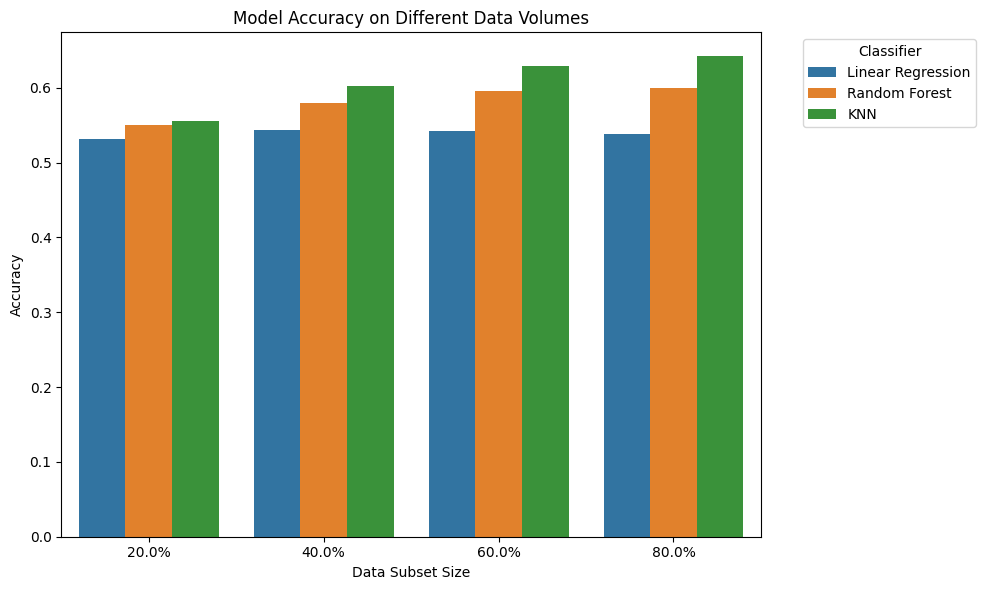

In [325]:
# Create the plot
plt.figure(figsize=(10, 6))
sns.barplot(data=results_df, x='Data Subset', y='Accuracy', hue='Classifier')
plt.title('Model Accuracy on Different Data Volumes')
plt.ylabel('Accuracy')
plt.xlabel('Data Subset Size')
plt.legend(title='Classifier', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

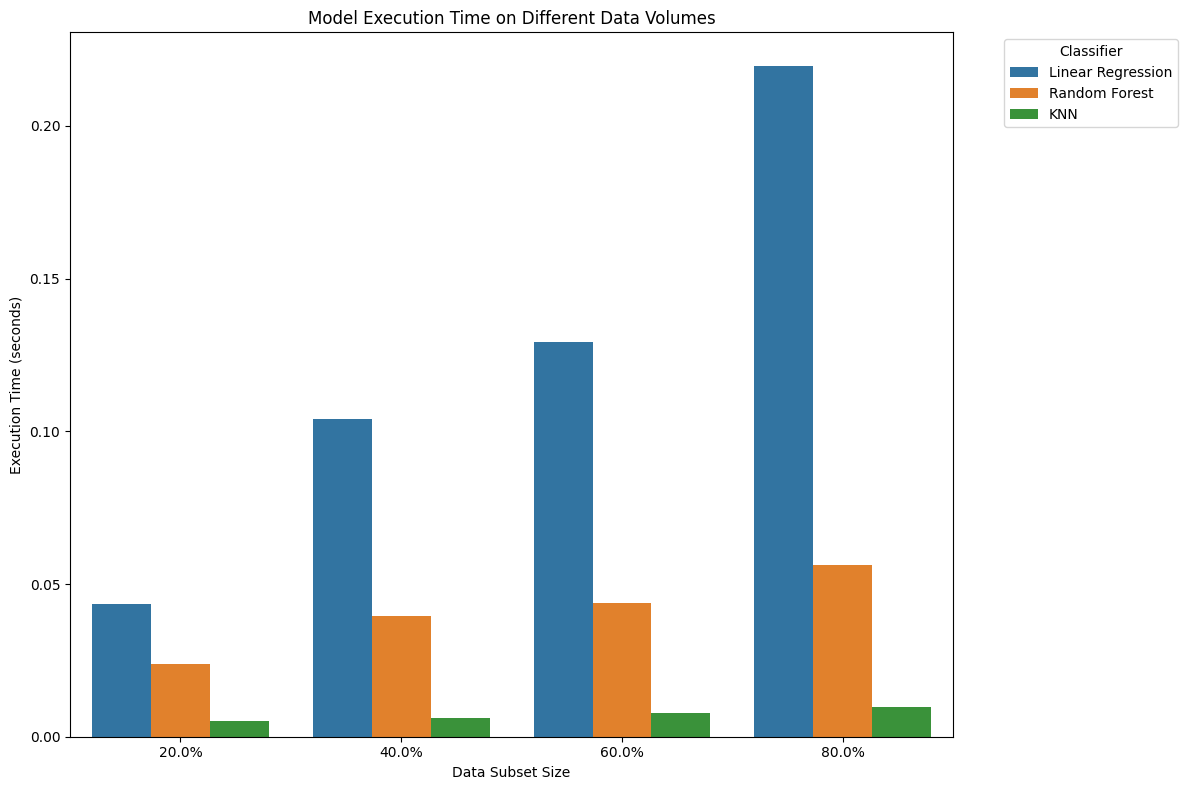

In [328]:
plt.figure(figsize=(12, 8))
sns.barplot(data=results_df, x='Data Subset', y='Execution Time (s)', hue='Classifier')
plt.title('Model Execution Time on Different Data Volumes')
plt.ylabel('Execution Time (seconds)')
plt.xlabel('Data Subset Size')
plt.legend(title='Classifier', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

## Conclusion

At the project's conclusion, we've arrived at intriguing findings. The KNN model excelled in scalability and sustained notable accuracy across varying data subsets, asserting itself as the most consistent performer for our wine quality prediction task. Its robustness in facing different data volumes makes it a strong candidate for operational use, especially when both speed and accuracy are prioritized.

In contrast, the Random Forest classifier occupied the middle ground in terms of both accuracy and execution time. As data volume increased, so did its execution time, indicating that while Random Forest can capture intricate data patterns effectively, it might become less viable as datasets grow, potentially limiting its scalability.

The Logistic Regression model, unfortunately, underperformed in our evaluations. It had the lowest accuracy and required the most time to execute, challenging our expectations of this typically fast and straightforward model. The results suggest that Logistic Regression may struggle with the complexity of the data or that the model was not as well-suited to this particular task as the other classifiers.

Throughout the project, we encountered hurdles. Feature selection failed to enhance the Logistic Regression and Random Forest models. The intricacies within the feature set might have been too interdependent for such reduction techniques, potentially explaining why simplifying the feature space was detrimental. Furthermore, hyperparameter tuning did not improve the Random Forest, possibly indicating that the model's default settings were already appropriate or that our tuning did not hit the right combination of parameters.

Looking ahead, we anticipate focusing on feature engineering to discover subtler data relationships and testing various ensemble techniques to capitalize on each model's unique advantages. The goal will be to forge a composite model that yields the highest predictive power with manageable computational demands.

To summarize, our analysis has shown that the KNN model, thanks to its advantageous blend of accuracy and computational efficiency, appears to be the most suitable for scaling up with larger datasets. The Random Forest classifier could still be favored in scenarios where the balance of accuracy and time efficiency meets the project's needs, despite its middling execution time. Logistic Regression, given its disappointing performance in both speed and accuracy, would require significant refinements or reconsideration in favor of more robust alternatives. Our future efforts will be directed towards enhancing these models, potentially uniting them into a potent ensemble, to achieve the most effective wine quality predictions while optimizing for computational resources.